# How does Hough line transform work?

1. Find the edge of the image using canny-edge detection.
2. For each pixel in the edge image:
    - Calculate distance (rho) from that point.
    - Sweep through angles 0 to 180 drawing a line.
    - Count how pixels intersect with that line.
3. Apply a threshold and determine which combo of rho and theta have the high values, which correspond to the lines.

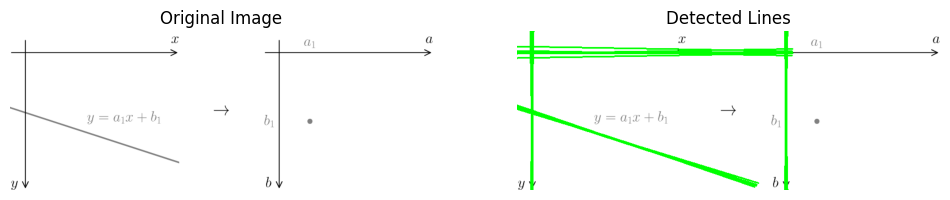

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
img = cv2.imread('img_1.png')  # Replace 'img_1.png' with your image path
if img is None:
    print("Error: Image not found!")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect lines using HoughLines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Make a copy of the original image to draw lines on
img_lines = img.copy()

# Check if any lines are detected
if lines is not None:
    for line in lines:
        rho, theta = line[0]  # Extract rho and theta here
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 500 * (-b))
        y1 = int(y0 + 500 * a)
        x2 = int(x0 - 500 * (-b))
        y2 = int(y0 - 500 * a)
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("No lines detected")

# Convert BGR to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lines_rgb = cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)

# Plot the images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Detected Lines")
plt.imshow(img_lines_rgb)
plt.axis('off')

plt.show()
